# Exercise 1

### Julian Ornelas

For each step below you must show your code and/or interpretation/narrative as separate code cells.

Once you have completed the exercise save and export your notebook as a pdf and submit that on Canvas.

**Due: 2024-02-13 11:59 pm**


## I. School Districts in California

1. Download the [GeoJSON file for the school districts in California](https://gis.data.ca.gov/datasets/6c2f651c068849da97fbc53954607af4/explore).
2. Create a GeoDataFrame from this file.
3. Report the number of districts by district type.
4. Create a categorical map displaying the different types of districts. Justify the choices of your map design.
5. Create individual maps by district type that display the locations of the districts.


## II. 2020 Poverty Estimates for School Districts

1. Download the spreadsheet [ussd20.xls](https://www2.census.gov/programs-surveys/saipe/datasets/2020/2020-school-districts/ussd20.xls).
2. Using Pandas, create a DataFrame for this dataset.
3. Which district has the largest Total Population?
4. Which district has the largest estimated population 5-17 years of age?
5. Create a new variable pct5to17 as the ratio of population 5-17 to the total population.
6. Create a new variable poverty_rate that is the ratio of the number of children 5-17 in poverty over the estimated population 5-17.


## III. Spatial Visual Analysis of Poverty across Districts in California

1. Using Pandas, create a new GeoDataFrame that merges the poverty and demographic data from the pandas DataFrame from part II, with the GeoDataFrame from Part I.
2. Which district in California has the largest estimated population?
3. Which district in California has the highest childhood poverty rate?
4. Create a choropleth map for poverty rates using declies.
5. For each type of district, use the bins from step 4 to develop a choropleth map of poverty rates for districts of that type.
6. Comment on the patterns you see in the maps from steps 4 and 5.
7. Create a four-class map:
    1 districts with high pct5to17 and high poverty;
    2 districts with low pct5to17 and high poverty;
    3 districts with low pct5to17 and low poverty;
    4 districts with high pct5to17 and low poverty.
    (Use the median to determine high/low for each variable)
8. Provide an interpretation of the four-class map.

## BEGIN WORK

## I. School Districts in California

1. Download the [GeoJSON file for the school districts in California](https://gis.data.ca.gov/datasets/6c2f651c068849da97fbc53954607af4/explore).
2. Create a GeoDataFrame from this file.


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import os

os.environ['PROJ_LIB'] = '/opt/tljh/user/share/proj'

In [2]:
file_name = '/home/jupyter-jornelas3843/California_School_District_Areas_2020-21.geojson'

ca_data = gpd.read_file(file_name)
ca_data.head()

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictName,DistrictType,GradeLow,GradeHigh,...,SWDcount,SWDpct,SEDcount,SEDpct,FRPMcount,FRPMpct,DistrctAreaSqMi,Shape__Area,Shape__Length,geometry
0,1,2020-21,0601770,0161119,01611190000000,Alameda,Alameda Unified,Unified,PK,12,...,1275,11.7,3202,29.3,3101,28.4,11.455570,4.755489e+07,56522.982683,"MULTIPOLYGON (((-122.22678 37.72651, -122.2267..."
1,2,2020-21,0601860,0161127,01611270000000,Alameda,Albany City Unified,Unified,KG,12,...,311,8.9,608,17.4,587,16.8,1.703654,7.096327e+06,12696.382797,"POLYGON ((-122.28671 37.89852, -122.28673 37.8..."
2,3,2020-21,0604740,0161143,01611430000000,Alameda,Berkeley Unified,Unified,PK,12,...,1091,11.6,2563,27.2,2431,25.8,10.483362,4.364648e+07,43695.341538,"POLYGON ((-122.25606 37.89834, -122.25607 37.8..."
3,4,2020-21,0607800,0161150,01611500000000,Alameda,Castro Valley Unified,Unified,PK,12,...,850,9.2,2067,22.5,1977,21.5,68.442604,2.838285e+08,142492.767565,"MULTIPOLYGON (((-122.00504 37.63629, -122.0050..."
4,5,2020-21,0612630,0161168,01611680000000,Alameda,Emery Unified,Unified,PK,12,...,69,9.9,561,80.4,555,79.5,1.289416,5.363392e+06,13741.272894,"POLYGON ((-122.29663 37.83110, -122.29778 37.8..."


In [3]:
ca_data.shape

(942, 57)

3. Report the number of districts by district type.


In [4]:
ca_data.groupby(by='DistrictType').count()['OBJECTID']

DistrictType
Elementary    522
High           76
Unified       344
Name: OBJECTID, dtype: int64

4. Create a categorical map displaying the different types of districts. Justify the choices of your map design.


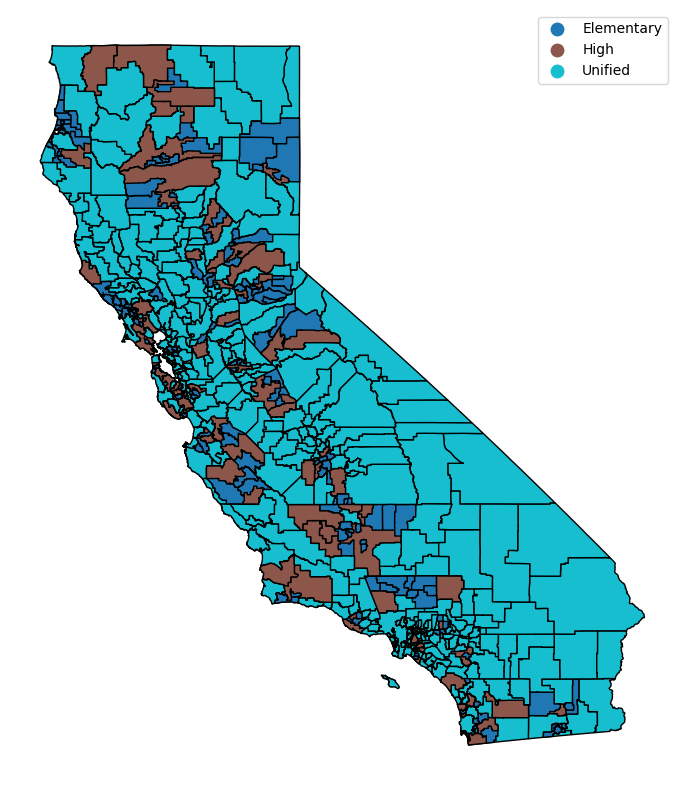

In [5]:
f, ax = plt.subplots(1, figsize=(15, 10))
ca_data.plot(column='DistrictType', ax=ax, edgecolor='k', legend=True)
ax.set_axis_off()
plt.show()

#cyan, blue, brown

I chose to plot the 'DistrictType' column to see how all the districts are geographically laid out and what category they each fall under.  It would not have made sense to plot by 'DistrictName' because the map would have had 942 different colors, one for each district.  The three-color scheme was automatically generated (not user-provided) and it makes it very easy to see the concentration of the district types.  California clearly has a large number of Unified districts spread out across the state from north to south.

5. Create individual maps by district type that display the locations of the districts.

In [6]:
elem_dist = ca_data[ca_data.DistrictType == 'Elementary']

high_dist = ca_data[ca_data.DistrictType == 'High']

unified_dist = ca_data[ca_data.DistrictType == 'Unified']

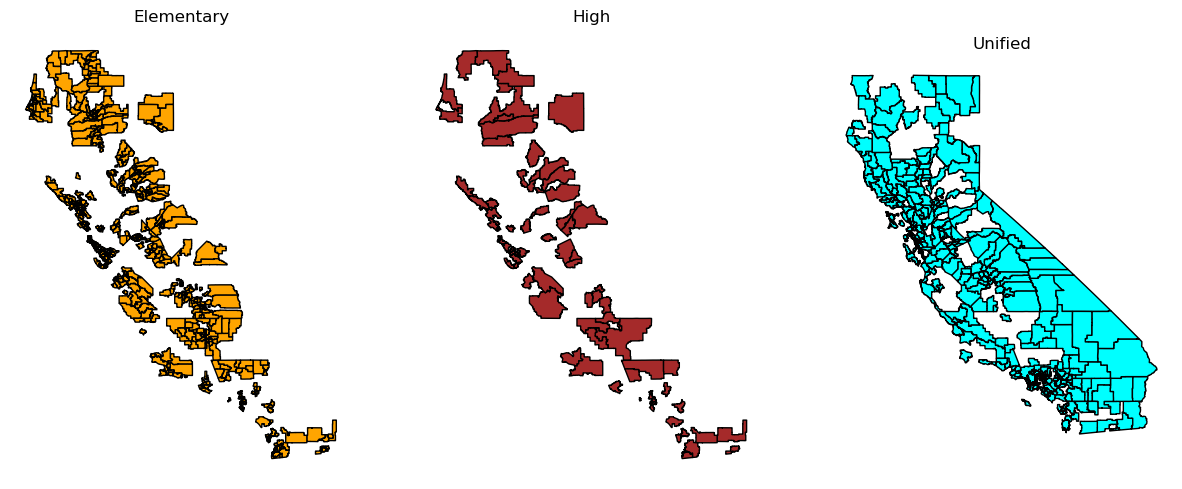

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

elem_dist.plot(ax=axs[0], color='orange', edgecolor='k', legend=True)
axs[0].set_title('Elementary')
axs[0].set_axis_off()

high_dist.plot(ax=axs[1], color='brown', edgecolor='k', legend=True)
axs[1].set_title('High')
axs[1].set_axis_off()

unified_dist.plot(ax=axs[2], color='cyan', edgecolor='k', legend=True)
axs[2].set_title('Unified')
axs[2].set_axis_off()

plt.show()

## II. 2020 Poverty Estimates for School Districts

1. Download the spreadsheet [ussd20.xls](https://www2.census.gov/programs-surveys/saipe/datasets/2020/2020-school-districts/ussd20.xls).
2. Using Pandas, create a DataFrame for this dataset.



In [8]:
file_name = '/home/jupyter-jornelas3843/ussd20.xls'

poverty_data = pd.read_excel(file_name, skiprows=2)
poverty_data.head()

,State Postal Code,State FIPS Code,District ID,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder
0,AL,1,190,Alabaster City School District,35268,6797,669
1,AL,1,5,Albertville City School District,22120,4163,918
2,AL,1,30,Alexander City City School District,16819,2579,700
3,AL,1,60,Andalusia City School District,8818,1471,346
4,AL,1,90,Anniston City School District,22017,3053,735


3. Which district has the largest Total Population?


In [9]:
poverty_data[['Name', 'Estimated Total Population']].groupby(by='Name').max().\
    sort_values(by='Estimated Total Population', ascending=False).iloc[0]

Estimated Total Population    8253213
Name: New York City Department Of Education, dtype: int64

4. Which district has the largest estimated population 5-17 years of age?


In [10]:
poverty_data[['Name', 'Estimated Population 5-17']].groupby(by='Name').max().\
    sort_values(by='Estimated Population 5-17', ascending=False).iloc[0]

Estimated Population 5-17    1182931
Name: New York City Department Of Education, dtype: int64

5. Create a new variable pct5to17 as the ratio of population 5-17 to the total population.


In [11]:
poverty_data['pct5to17'] = poverty_data['Estimated Population 5-17'] / poverty_data['Estimated Total Population']
poverty_data.head()

,State Postal Code,State FIPS Code,District ID,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder,pct5to17
0,AL,1,190,Alabaster City School District,35268,6797,669,0.192724
1,AL,1,5,Albertville City School District,22120,4163,918,0.188201
2,AL,1,30,Alexander City City School District,16819,2579,700,0.153338
3,AL,1,60,Andalusia City School District,8818,1471,346,0.166818
4,AL,1,90,Anniston City School District,22017,3053,735,0.138666


6. Create a new variable poverty_rate that is the ratio of the number of children 5-17 in poverty over the estimated population 5-17.

In [12]:
poverty_data['poverty_rate'] = poverty_data['Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder'] / poverty_data['Estimated Total Population']
poverty_data.head()

,State Postal Code,State FIPS Code,District ID,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder,pct5to17,poverty_rate
0,AL,1,190,Alabaster City School District,35268,6797,669,0.192724,0.018969
1,AL,1,5,Albertville City School District,22120,4163,918,0.188201,0.041501
2,AL,1,30,Alexander City City School District,16819,2579,700,0.153338,0.041620
3,AL,1,60,Andalusia City School District,8818,1471,346,0.166818,0.039238
4,AL,1,90,Anniston City School District,22017,3053,735,0.138666,0.033383


## III. Spatial Visual Analysis of Poverty across Districts in California

1. Using Pandas, create a new GeoDataFrame that merges the poverty and demographic data from the pandas DataFrame from part II, with the GeoDataFrame from Part I.


In [13]:
ca_data.head()

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictName,DistrictType,GradeLow,GradeHigh,...,SWDcount,SWDpct,SEDcount,SEDpct,FRPMcount,FRPMpct,DistrctAreaSqMi,Shape__Area,Shape__Length,geometry
0,1,2020-21,0601770,0161119,01611190000000,Alameda,Alameda Unified,Unified,PK,12,...,1275,11.7,3202,29.3,3101,28.4,11.455570,4.755489e+07,56522.982683,"MULTIPOLYGON (((-122.22678 37.72651, -122.2267..."
1,2,2020-21,0601860,0161127,01611270000000,Alameda,Albany City Unified,Unified,KG,12,...,311,8.9,608,17.4,587,16.8,1.703654,7.096327e+06,12696.382797,"POLYGON ((-122.28671 37.89852, -122.28673 37.8..."
2,3,2020-21,0604740,0161143,01611430000000,Alameda,Berkeley Unified,Unified,PK,12,...,1091,11.6,2563,27.2,2431,25.8,10.483362,4.364648e+07,43695.341538,"POLYGON ((-122.25606 37.89834, -122.25607 37.8..."
3,4,2020-21,0607800,0161150,01611500000000,Alameda,Castro Valley Unified,Unified,PK,12,...,850,9.2,2067,22.5,1977,21.5,68.442604,2.838285e+08,142492.767565,"MULTIPOLYGON (((-122.00504 37.63629, -122.0050..."
4,5,2020-21,0612630,0161168,01611680000000,Alameda,Emery Unified,Unified,PK,12,...,69,9.9,561,80.4,555,79.5,1.289416,5.363392e+06,13741.272894,"POLYGON ((-122.29663 37.83110, -122.29778 37.8..."


In [14]:
ca_poverty_data = poverty_data[poverty_data['State Postal Code'] == 'CA']
ca_poverty_data.head(10)

,State Postal Code,State FIPS Code,District ID,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder,pct5to17,poverty_rate
644,CA,6,1620,ABC Unified School District,107291,16966,1984,0.158131,0.018492
645,CA,6,1650,Acalanes Union High School District,118616,5918,121,0.049892,0.001020
646,CA,6,1680,Ackerman Elementary School District,2959,280,26,0.094627,0.008787
647,CA,6,1,Acton-Agua Dulce Unified School District,12759,1857,187,0.145544,0.014656
648,CA,6,1710,Adelanto Elementary School District,60890,7102,1864,0.116637,0.030613
649,CA,6,1770,Alameda City Unified School District,81243,11094,806,0.136553,0.009921
650,CA,6,1860,Albany City Unified School District,20467,3218,168,0.157229,0.008208
651,CA,6,1890,Alexander Valley Union School District,890,50,3,0.056180,0.003371
652,CA,6,153,Alhambra Unified School District,171138,16406,2580,0.095864,0.015076
653,CA,6,1950,Alisal Union Elementary School District,58882,8006,1563,0.135967,0.026545


In [15]:
ca_poverty_data.dtypes

State Postal Code                                                                                         object
State FIPS Code                                                                                            int64
District ID                                                                                                int64
Name                                                                                                      object
Estimated Total Population                                                                                 int64
Estimated Population 5-17                                                                                  int64
Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder      int64
pct5to17                                                                                                 float64
poverty_rate                                                                                    

Before we can merge the two dataframes together, we have to figure out which column to merge on.  It cannot be the 'Name' or 'District Name' columns, because the names of the districts in the dataframes do not match exactly.  For example, 'Alameda City Unified School District' versus 'Alameda Unified'.

We can create the 'FedID' column from the ca_data dataframe using the 'State FIPS Code' and 'District ID' columns inside the ca_poverty_data dataframe.  We use the process learned in class as follows:

- Turn the 'State FIPS Code' column into a string type and use zero-padding for length of 2.
- Repeat with 'District ID' column, but use 5.

In [16]:
#Zero-pad the District_ID values to 5
#Zero-pad the State_FIPS_Code

ca_poverty_data['State FIPS Code'] = ca_poverty_data['State FIPS Code'].astype(str).str.zfill(2)
ca_poverty_data.head()

/tmp/ipykernel_3317716/4173189087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_poverty_data['State FIPS Code'] = ca_poverty_data['State FIPS Code'].astype(str).str.zfill(2)


,State Postal Code,State FIPS Code,District ID,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder,pct5to17,poverty_rate
644,CA,06,1620,ABC Unified School District,107291,16966,1984,0.158131,0.018492
645,CA,06,1650,Acalanes Union High School District,118616,5918,121,0.049892,0.001020
646,CA,06,1680,Ackerman Elementary School District,2959,280,26,0.094627,0.008787
647,CA,06,1,Acton-Agua Dulce Unified School District,12759,1857,187,0.145544,0.014656
648,CA,06,1710,Adelanto Elementary School District,60890,7102,1864,0.116637,0.030613


In [17]:
ca_poverty_data['District ID'] = ca_poverty_data['District ID'].astype(str).str.zfill(5)
ca_poverty_data.head()

/tmp/ipykernel_3317716/480497542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_poverty_data['District ID'] = ca_poverty_data['District ID'].astype(str).str.zfill(5)


,State Postal Code,State FIPS Code,District ID,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder,pct5to17,poverty_rate
644,CA,06,01620,ABC Unified School District,107291,16966,1984,0.158131,0.018492
645,CA,06,01650,Acalanes Union High School District,118616,5918,121,0.049892,0.001020
646,CA,06,01680,Ackerman Elementary School District,2959,280,26,0.094627,0.008787
647,CA,06,00001,Acton-Agua Dulce Unified School District,12759,1857,187,0.145544,0.014656
648,CA,06,01710,Adelanto Elementary School District,60890,7102,1864,0.116637,0.030613


Now we concatenate the columns together to form the 'FedID' attribute.

In [18]:
ca_poverty_data['FedID'] = ca_poverty_data['State FIPS Code'] + ca_poverty_data['District ID']
ca_poverty_data.head()

/tmp/ipykernel_3317716/2030010971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_poverty_data['FedID'] = ca_poverty_data['State FIPS Code'] + ca_poverty_data['District ID']


,State Postal Code,State FIPS Code,District ID,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder,pct5to17,poverty_rate,FedID
644,CA,06,01620,ABC Unified School District,107291,16966,1984,0.158131,0.018492,0601620
645,CA,06,01650,Acalanes Union High School District,118616,5918,121,0.049892,0.001020,0601650
646,CA,06,01680,Ackerman Elementary School District,2959,280,26,0.094627,0.008787,0601680
647,CA,06,00001,Acton-Agua Dulce Unified School District,12759,1857,187,0.145544,0.014656,0600001
648,CA,06,01710,Adelanto Elementary School District,60890,7102,1864,0.116637,0.030613,0601710


The dataframes are now ready to be merged using the 'FedID' attribute.

In [19]:
merged_df = ca_data.merge(ca_poverty_data, left_on='FedID', right_on='FedID', how='left')
merged_df.head()

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictName,DistrictType,GradeLow,GradeHigh,...,geometry,State Postal Code,State FIPS Code,District ID,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder,pct5to17,poverty_rate
0,1,2020-21,0601770,0161119,01611190000000,Alameda,Alameda Unified,Unified,PK,12,...,"MULTIPOLYGON (((-122.22678 37.72651, -122.2267...",CA,06,01770,Alameda City Unified School District,81243,11094,806,0.136553,0.009921
1,2,2020-21,0601860,0161127,01611270000000,Alameda,Albany City Unified,Unified,KG,12,...,"POLYGON ((-122.28671 37.89852, -122.28673 37.8...",CA,06,01860,Albany City Unified School District,20467,3218,168,0.157229,0.008208
2,3,2020-21,0604740,0161143,01611430000000,Alameda,Berkeley Unified,Unified,PK,12,...,"POLYGON ((-122.25606 37.89834, -122.25607 37.8...",CA,06,04740,Berkeley Unified School District,123764,9695,653,0.078335,0.005276
3,4,2020-21,0607800,0161150,01611500000000,Alameda,Castro Valley Unified,Unified,PK,12,...,"MULTIPOLYGON (((-122.00504 37.63629, -122.0050...",CA,06,07800,Castro Valley Unified School District,53903,8954,449,0.166113,0.008330
4,5,2020-21,0612630,0161168,01611680000000,Alameda,Emery Unified,Unified,PK,12,...,"POLYGON ((-122.29663 37.83110, -122.29778 37.8...",CA,06,12630,Emery Unified School District,11116,610,87,0.054876,0.007827


In [20]:
#Verify that the merged_df is a GeoDataFrame
type(merged_df)

geopandas.geodataframe.GeoDataFrame

2. Which district in California has the largest estimated population?

In [21]:
merged_df[['Name', 'Estimated Total Population']].groupby(by='Name').max().\
    sort_values(by='Estimated Total Population', ascending=False).iloc[0]

Estimated Total Population    4597582
Name: Los Angeles Unified School District, dtype: int64

3. Which district in California has the highest childhood poverty rate?

In [22]:
merged_df[['Name', 'poverty_rate']].groupby(by='Name').max().\
    sort_values(by='poverty_rate', ascending=False).iloc[0]

poverty_rate    0.075248
Name: Allensworth Elementary School District, dtype: float64

4. Create a choropleth map for poverty rates using deciles.

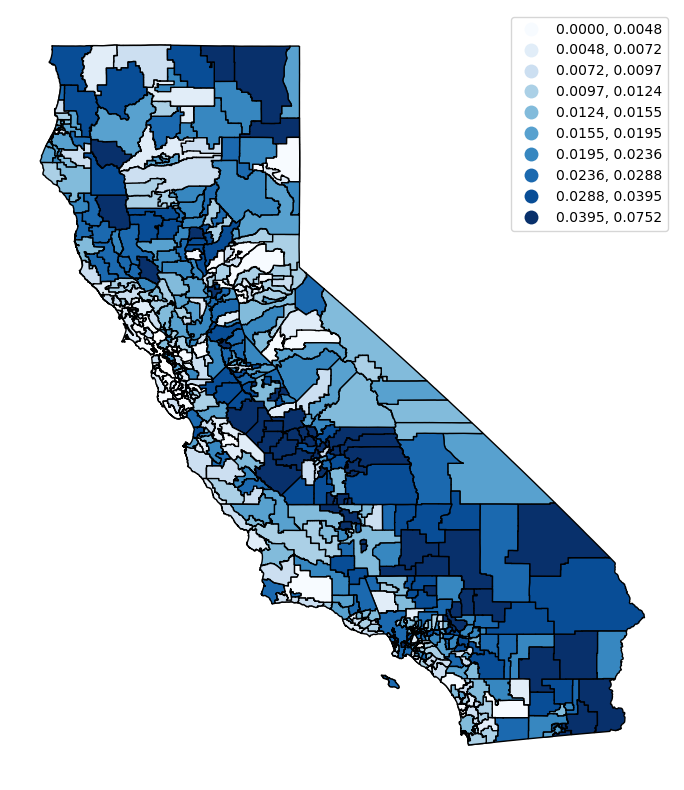

In [23]:
f, ax = plt.subplots(1, figsize=(15, 10))
merged_df.plot(column='poverty_rate', scheme='Quantiles', ax=ax, k=10, cmap='Blues', 
               edgecolor='k', legend=True, legend_kwds={"fmt": "{:.4f}"})
ax.set_axis_off()
plt.show()

In [24]:
import mapclassify

bins = mapclassify.Quantiles(merged_df['poverty_rate'], k=10)
bins.bins

array([0.00475388, 0.00724644, 0.0096511 , 0.01240906, 0.01550848,
       0.01947889, 0.02363234, 0.02876862, 0.0394849 , 0.07524752])

5. For each type of district, use the bins from step 4 to develop a choropleth map of poverty rates for districts of that type.

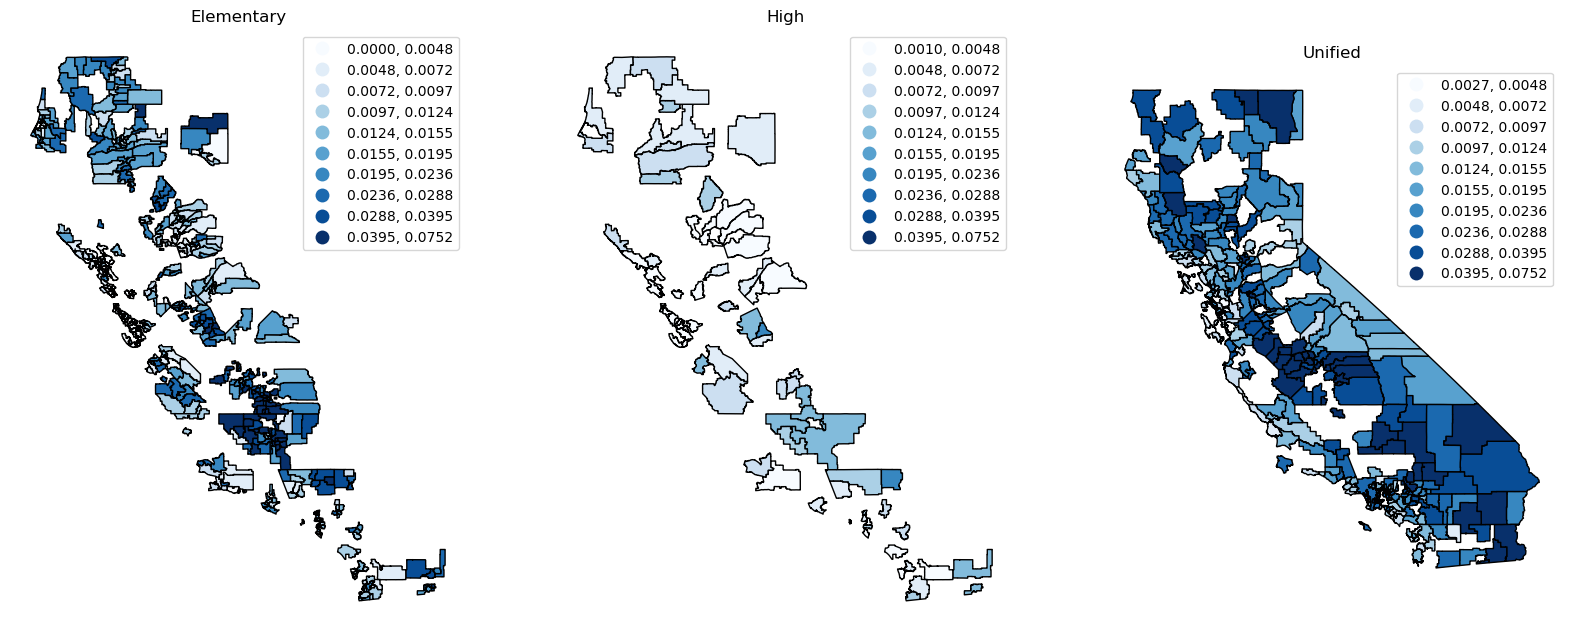

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

elem_dist = merged_df[merged_df['DistrictType'] == 'Elementary']
elem_dist.plot(column='poverty_rate', scheme='UserDefined', classification_kwds={'bins': bins.bins}, 
               ax=axs[0], cmap='Blues', edgecolor='k', legend=True, legend_kwds={"fmt": "{:.4f}"})
axs[0].set_title('Elementary')
axs[0].set_axis_off()

high_dist = merged_df[merged_df['DistrictType'] == 'High']
high_dist.plot(column='poverty_rate', scheme='UserDefined', classification_kwds={'bins': bins.bins}, 
               ax=axs[1], cmap='Blues', edgecolor='k', legend=True, legend_kwds={"fmt": "{:.4f}"})
axs[1].set_title('High')
axs[1].set_axis_off()

unified_dist = merged_df[merged_df['DistrictType'] == 'Unified']
unified_dist.plot(column='poverty_rate', scheme='UserDefined', classification_kwds={'bins': bins.bins}, 
                  ax=axs[2], cmap='Blues', edgecolor='k', legend=True, legend_kwds={"fmt": "{:.4f}"})
axs[2].set_title('Unified')
axs[2].set_axis_off()

plt.show()

6. Comment on the patterns you see in the maps from steps 4 and 5.


For the map in Step 4, the darker blue-colored districts are those with higher poverty rates and they appear to be concentrated in the Central Valley and the more remote parts of the state, like in the far north (near Oregon border) and the desert regions (Mojave, Death Valley, Imperial).  The lighter-colored districts are the wealthier areas (lower poverty) and they tend to be at or near the coast.  Some of the notable/recognizable areas include Marin County, SF Bay Area, Santa Barbara, Orange County, and San Diego.

In Step 5, all but a few of the High-type districts fall into the lower poverty bins (5th decile or below).  In contrast, the Unified districts all appear to fall into the higher bins.  Those districts are the biggest by coverage compared to the other two categories because they encompass all grade levels from K-12.  

7. Create a four-class map:
    1. districts with high pct5to17 and low poverty;
    2. districts with low pct5to17 and low poverty;
    3. districts with low pct5to17 and high poverty;
    4. districts with high pct5to17 and high poverty.
    (Use the median to determine high/low for each variable)

In [26]:
from statistics import median

median_pct5to17 = median(merged_df['pct5to17'])
median_poverty = median(merged_df['poverty_rate'])

median_pct5to17, median_poverty

(0.12406061186427614, 0.015508478270680026)

In [27]:
def add_classes(row):
    if (row['pct5to17'] > median_pct5to17) and (row['poverty_rate'] < median_poverty):
        result = 'A'
    elif (row['pct5to17'] < median_pct5to17) and (row['poverty_rate'] < median_poverty):
        result = 'B'
    elif (row['pct5to17'] < median_pct5to17) and (row['poverty_rate'] > median_poverty):
        result = 'C'
    else: # (> median_pct5to17) and (> median_poverty)
        result = 'D'

    return result

In [28]:
merged_df['new_class'] = merged_df.apply(add_classes, axis=1)
merged_df.head(10)

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictName,DistrictType,GradeLow,GradeHigh,...,State Postal Code,State FIPS Code,District ID,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder,pct5to17,poverty_rate,new_class
0,1,2020-21,0601770,0161119,01611190000000,Alameda,Alameda Unified,Unified,PK,12,...,CA,06,01770,Alameda City Unified School District,81243,11094,806,0.136553,0.009921,A
1,2,2020-21,0601860,0161127,01611270000000,Alameda,Albany City Unified,Unified,KG,12,...,CA,06,01860,Albany City Unified School District,20467,3218,168,0.157229,0.008208,A
2,3,2020-21,0604740,0161143,01611430000000,Alameda,Berkeley Unified,Unified,PK,12,...,CA,06,04740,Berkeley Unified School District,123764,9695,653,0.078335,0.005276,B
3,4,2020-21,0607800,0161150,01611500000000,Alameda,Castro Valley Unified,Unified,PK,12,...,CA,06,07800,Castro Valley Unified School District,53903,8954,449,0.166113,0.008330,A
4,5,2020-21,0612630,0161168,01611680000000,Alameda,Emery Unified,Unified,PK,12,...,CA,06,12630,Emery Unified School District,11116,610,87,0.054876,0.007827,B
5,6,2020-21,0614400,0161176,01611760000000,Alameda,Fremont Unified,Unified,PK,12,...,CA,06,14400,Fremont Unified School District,235615,37857,1691,0.160673,0.007177,A
6,7,2020-21,0616740,0161192,01611920000000,Alameda,Hayward Unified,Unified,PK,12,...,CA,06,16740,Hayward Unified School District,181911,27801,2822,0.152827,0.015513,D
7,8,2020-21,0622110,0161200,01612000000000,Alameda,Livermore Valley Joint Unified,Unified,PK,12,...,CA,06,22110,Livermore Valley Joint Unified School District,92728,15883,737,0.171286,0.007948,A
8,9,2020-21,0626130,0161218,01612180000000,Alameda,Mountain House Elementary,Elementary,KG,08,...,CA,06,26130,Mountain House Elementary School District,386,56,5,0.145078,0.012953,A
9,10,2020-21,0627060,0161234,01612340000000,Alameda,Newark Unified,Unified,PK,12,...,CA,06,27060,Newark Unified School District,46860,7638,481,0.162996,0.010265,A


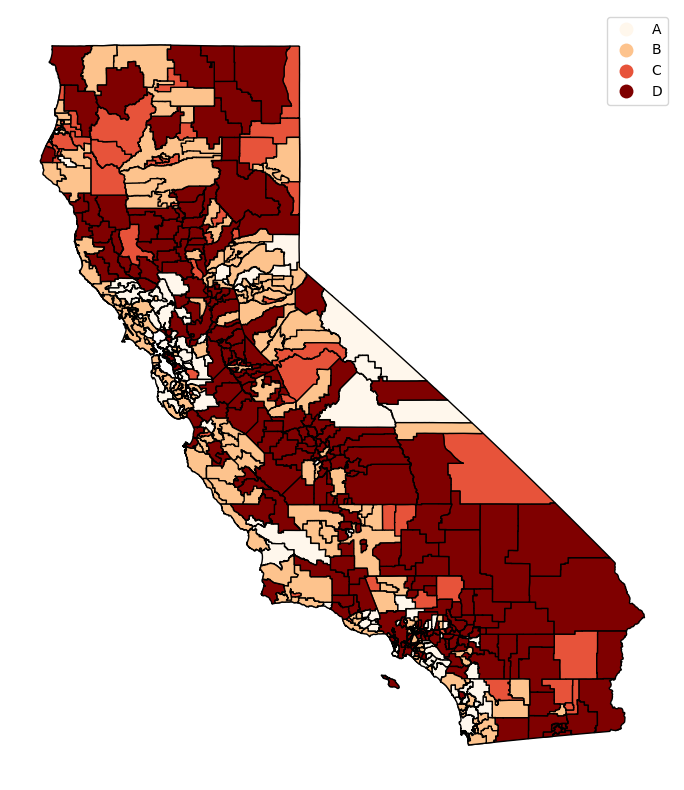

In [29]:
f, ax = plt.subplots(1, figsize=(15, 10))
merged_df.plot(column='new_class', ax=ax, cmap='OrRd', categorical=True, edgecolor='k', legend=True)
ax.set_axis_off()
plt.show()

8. Provide an interpretation of the four-class map.

The majority of the districts in the state fall into the "D" category, indicated by the dark red color, meaning they have a higher percentage of 5-to-17-year-olds and a higher poverty rate.  Quite a handful of them seem to surround one or two "C"-category districts (the orange color).  The C category also represents higher poverty rates but lower percentages of 5-to-17-year-olds.  This tells me that some of the orange-colored districts are likely High-type ones because they have an older student population (9th through 12th).  Given where some of the orange shapes are, it's also likely that there is only one high school in that district because it is in a remote area.